In [0]:
# CNN
# CNN has the ability to learn local features and is resistent to euclidean transformations.
# whereas the DNN looks at the whole data at once.

In [0]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Input
import matplotlib.pyplot as plt
# cifar
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 
               'frog', 'horse', 'ship', 'truck']

In [0]:
train_images.shape, test_images.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

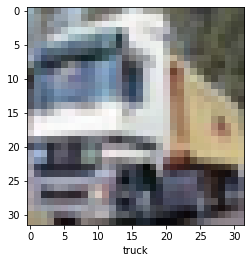

In [0]:
plt.imshow(train_images[1], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[1][0]])
plt.show()

In [0]:
inputs = Input(shape=(32, 32, 3))
conv1 = layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(inputs)
pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(pool1)
pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(pool2)
flat1 = layers.Flatten()(conv3)
dense1 = layers.Dense(64, activation='relu')(flat1)
outputs = layers.Dense(10, activation='softmax')(dense1)
model = models.Model(inputs=inputs, outputs=outputs)

In [0]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0   

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=1,
          validation_data=(test_images, test_labels))

1563/1563 [==============================] - 63s 41ms/step - loss: 1.2073 - accuracy: 0.5695 - val_loss: 1.1082 - val_accuracy: 0.6046


In [0]:
# Data augmentation
